<a href="https://colab.research.google.com/github/19521242bao/MNIST/blob/main/MLmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit recognition

In [ ]:
#import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


#Chuẩn bị dữ liệu

## **Load dữ liệu**

In [ ]:

# Định nghĩa các đường dẫn đến tập dữ liệu train và tập dữ liệu test
TRAIN_PATH = 'train_new.csv'
TEST_PATH = 'test_new.csv'

In [ ]:
!unzip digit_recognizer_new.zip 

Archive:  digit_recognizer_new.zip
  inflating: sample_submission_new.csv  
  inflating: test_new.csv            
  inflating: train_new.csv           


In [ ]:
data=pd.read_csv(TRAIN_PATH)

In [ ]:
data.columns
#số cột dữ liệu

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
data.shape# kích thước dữ liệu

(29400, 785)

In [ ]:
print(len(data))
#số lượng phần tử tập train

29400


## Xem một số thông tin của tập dữ liệu huấn luyện

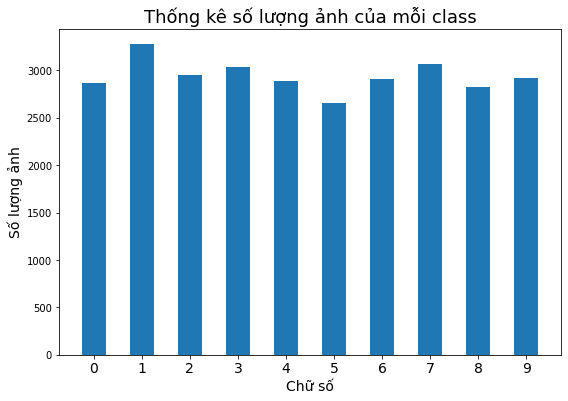

In [ ]:
digits=[0,1,2,3,4,5,6,7,8,9]
count=[0]*10
for i in range(len(data)):
  index=data['label'].values[i]
  count[index]+=1
fig,ax=plt.subplots(figsize=(9,6))
ax.bar(digit,count,width=0.5)
ax.set_title('Thống kê số lượng ảnh của mỗi class', fontsize=18)
ax.set_xlabel('Chữ số', fontsize=14)
ax.set_ylabel('Số lượng ảnh', fontsize=14)

plt.xticks(digits, fontsize=14)

plt.show()

**Dữ liệu rất cân bằng ở mỗi class**

#  Chia dữ liệu huấn luyện và chọn mô hình máy học

# phân chia tập dữ liệu

In [ ]:
percent_train = 0.75
len_train = int(len(data)*percent_train)

y_train = np.array(data['label'][0:len_train])
X_train = np.array(data.iloc[:len_train,1:])

y_test = np.array(data['label'][len_train:])
X_test = np.array(data.iloc[len_train:,1:])

## Chọn các mô hình máy học 

**Random Forest**



In [ ]:
#su dung random forest
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo một mô mình máy học.
modelRF = RandomForestClassifier(max_depth=15)

# Bắt đầu huấn luyện mô hình trên dữ liệu được phân chia.
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### SVM

In [ ]:
#rbf SVM
from sklearn.svm import SVC
modelSVM1 = SVC(kernel = 'linear', random_state = 0)
modelSVM1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#linear SVM
from sklearn.svm import SVC
modelSVM2 = SVC (kernel = 'linear', random_state = 0)
modelSVM2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
scoreNB=clf.score(X_test,y_test)
print(scoreNB)

0.5506122448979592


## kiểm tra độ chính xác của các model

In [ ]:
modelArray=[modelRF,model_lr,modelSVM1,modelSVM1,modelSVM2,clf]

In [ ]:
from sklearn.metrics import classification_report
for model in modelArray:
# Đưa ra dự đoán nhãn của các mẫu dữ liệu trong tập dữ liệu kiểm thử được phân chia ở trên
  y_pred = model.predict(X_test)

  # Tính toán mộ số độ đo đánh giá mô hình
  print(classification_report(y_true=y_test, y_pred=y_pred, target_names=[str(i) for i in range(10)]))

  # Tính độ chính xác của mô hình trên tập dữ liệu test đã được phân chia.
  score = model.score(X_test, y_test)
  print("Độ chính xác của mô hình là: {:.2f} %".format(score*100))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       724
           1       0.98      0.98      0.98       804
           2       0.95      0.97      0.96       728
           3       0.95      0.93      0.94       740
           4       0.95      0.95      0.95       718
           5       0.96      0.96      0.96       667
           6       0.97      0.97      0.97       727
           7       0.96      0.95      0.96       788
           8       0.95      0.93      0.94       719
           9       0.92      0.93      0.93       735

    accuracy                           0.95      7350
   macro avg       0.95      0.95      0.95      7350
weighted avg       0.95      0.95      0.95      7350

Độ chính xác của mô hình là: 95.50 %
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       724
           1       0.96      0.97      0.96       804
           2       0.89      0.90      0.

# Dự đoán nhãn cho dữ liệu test

In [ ]:
# Đọc dữ liệu từ file test
test_data = pd.read_csv(TEST_PATH)
test_vectors = np.array(test_data.iloc[:,:])

In [40]:
result = np.array(modelRF.predict(test_vectors))

In [ ]:
result_arr=[]

In [41]:
# Tạo một hàng đầu tiên có hai cột là ImangeID và Label
df = pd.DataFrame(columns=['ImageId','Label'])

# Duyệt dữ kết quả và ghi vào df
for i, v in enumerate(result):
  df = df.append({'ImageId':i+1,'Label':v}, ignore_index=True)

# Ghi ra file csv
df.to_csv('submission.csv',index = False)
#chọn lần lượt model ở trên để có các result thay đổi

### Ghi lại kết quả của bài toán vào file submission

In [ ]:
# # Tạo một hàng đầu tiên có hai cột là ImangeID và Label
# df = pd.DataFrame(columns=['ImageId','Label'])
# for result in result_arr:
# # Duyệt dữ kết quả và ghi vào df
#   for i, v in enumerate(result):
#     df = df.append({'ImageId':i+1,'Label':v}, ignore_index=True)

#   # Ghi ra file csv
#   df.to_csv(f'submission{i}.csv',index = False)

In [45]:
import math, requests

def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN='53d524ef8560d949225a8d9d0f564e09ce7d56aba25a56e303db0849e3db9b72f20a516b25d6eee74eb6fe5a97067d4fc3999778c315e8de174cc456e5042307'
    URL='http://submission.mmlab.uit.edu.vn/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)

In [46]:
path = 'submission.csv'
submit_data = pd.read_csv(path)
submit_prediction(submit_data, sep=',', index=True, comment='test submission')